<a href="https://colab.research.google.com/github/chu-ise/413A-2022/blob/main/notebooks/04/01-linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Simple linear regression with python

In [1]:
%%capture
%pip install statsmodels sklearn

In [2]:
%config InlineBackend.figure_format='retina'

In [3]:
import gdown
import os
id = "14xG8qNOuBuUbdR6NJ2lm_wN9T5_ZWjs8"

data_file = "Advertising.csv"
gdown.download(id=id, output=data_file, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=14xG8qNOuBuUbdR6NJ2lm_wN9T5_ZWjs8
To: /content/Advertising.csv
100%|██████████| 4.96k/4.96k [00:00<00:00, 1.49MB/s]


'Advertising.csv'

In [5]:
import scipy as sc
from scipy.stats import norm

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [6]:
advert = pd.read_csv(data_file,index_col=0) #load data; use the values in column 0 as index values
advert

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## Plot and describe the data

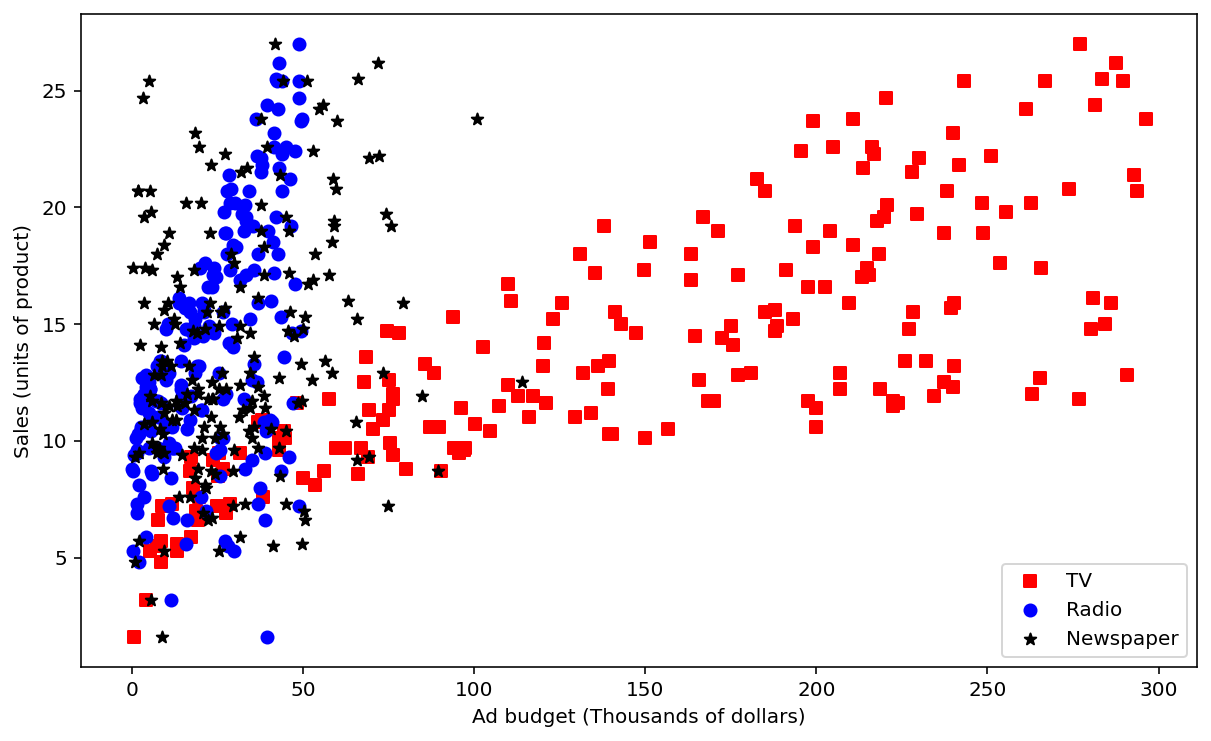

In [7]:
plt.scatter(x=advert['TV'],y=advert['Sales'],c='r',marker='s',label='TV')
plt.scatter(x=advert['Radio'],y=advert['Sales'],c='b',marker='o',label='Radio')
plt.scatter(x=advert['Newspaper'],y=advert['Sales'],c='k',marker='*',label='Newspaper')

plt.legend(loc=4)
plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()

In [8]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


First, let's just look at the **effect of TV advertising on sales**. We use the linear regression model
$$
Sales = \beta_0 + \beta_1 * TV.
$$

In [9]:
ad_TV_ols = sm.ols(formula="Sales ~ TV", data=advert).fit()
ad_TV_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.47e-42
Time:                        09:31:17   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

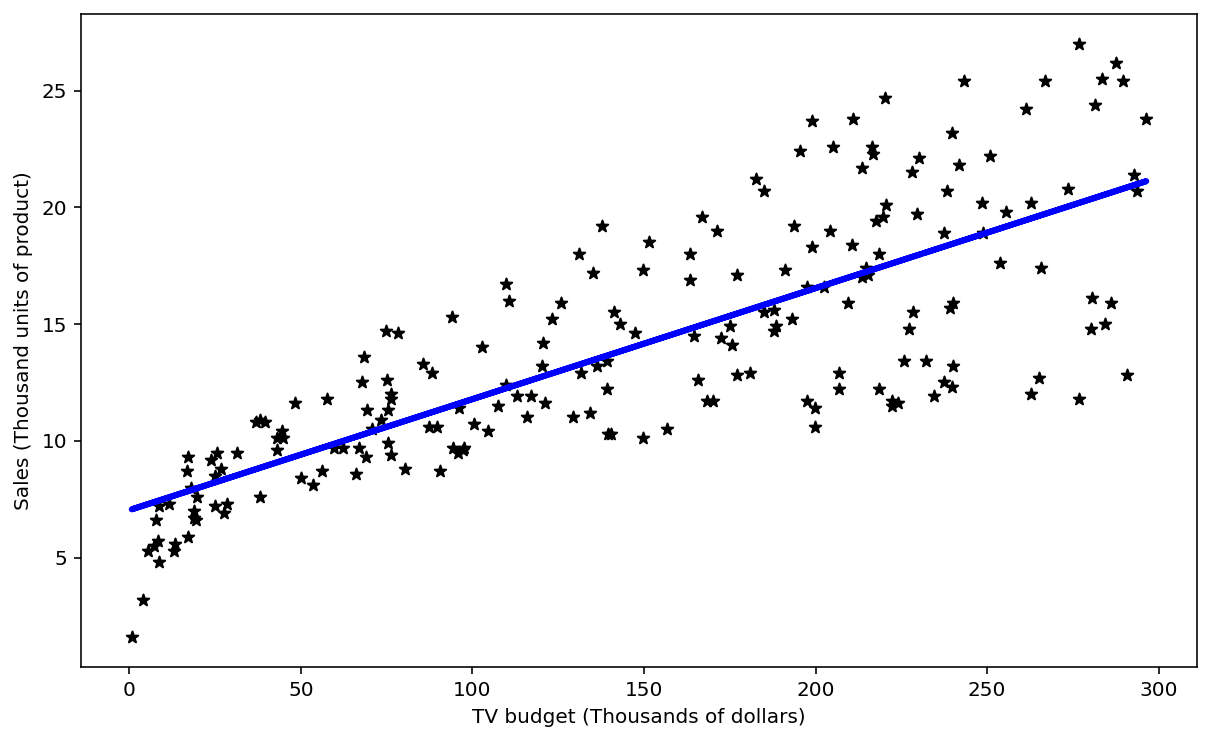

In [10]:
plt.scatter(x=advert['TV'],y=advert['Sales'],c='k',marker='*',label='TV')
plt.plot(advert['TV'],ad_TV_ols.predict(),color='blue',linewidth=3)

plt.xlabel('TV budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

In [11]:
ad_TV_ols.ssr

2102.5305831313517

## Repeating the simple linear regression with scikit-learn

200
[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.

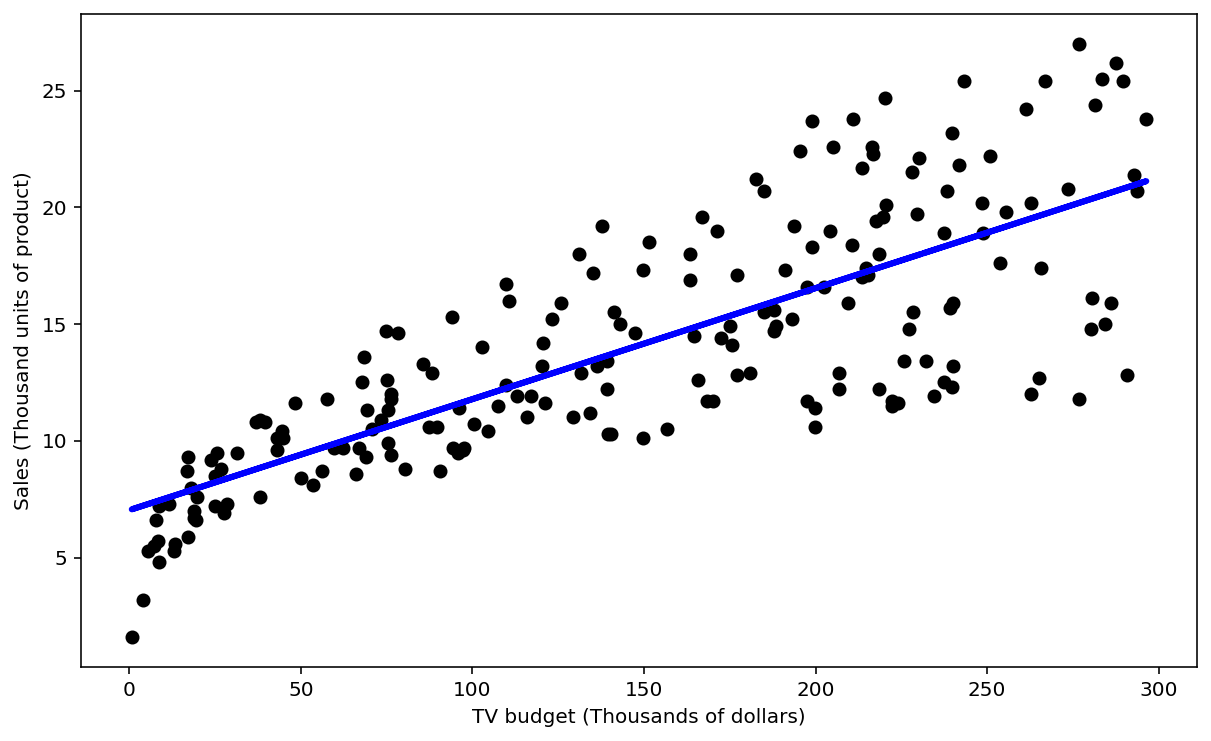

In [12]:
lr = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = advert['TV'].values.reshape(advert['TV'].shape[0],1)
y = advert['Sales'].values.reshape(advert['Sales'].shape[0],1)
print(advert['TV'].shape[0])
print(x)
print(type(x))

lr.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)

plt.xlabel('TV budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

## Hypothesis testing in linear regression



### An experiment
Before we go back and discuss the $p$-values for the advertising data, let's look at some synthetic data. We generate 100 random points according to the model 
$$
y = 3*x + \varepsilon,
$$
where $\varepsilon$ is normally distributed with mean zero and standard deviation 2. The best fit is found and this process is repeated 1000 times. 

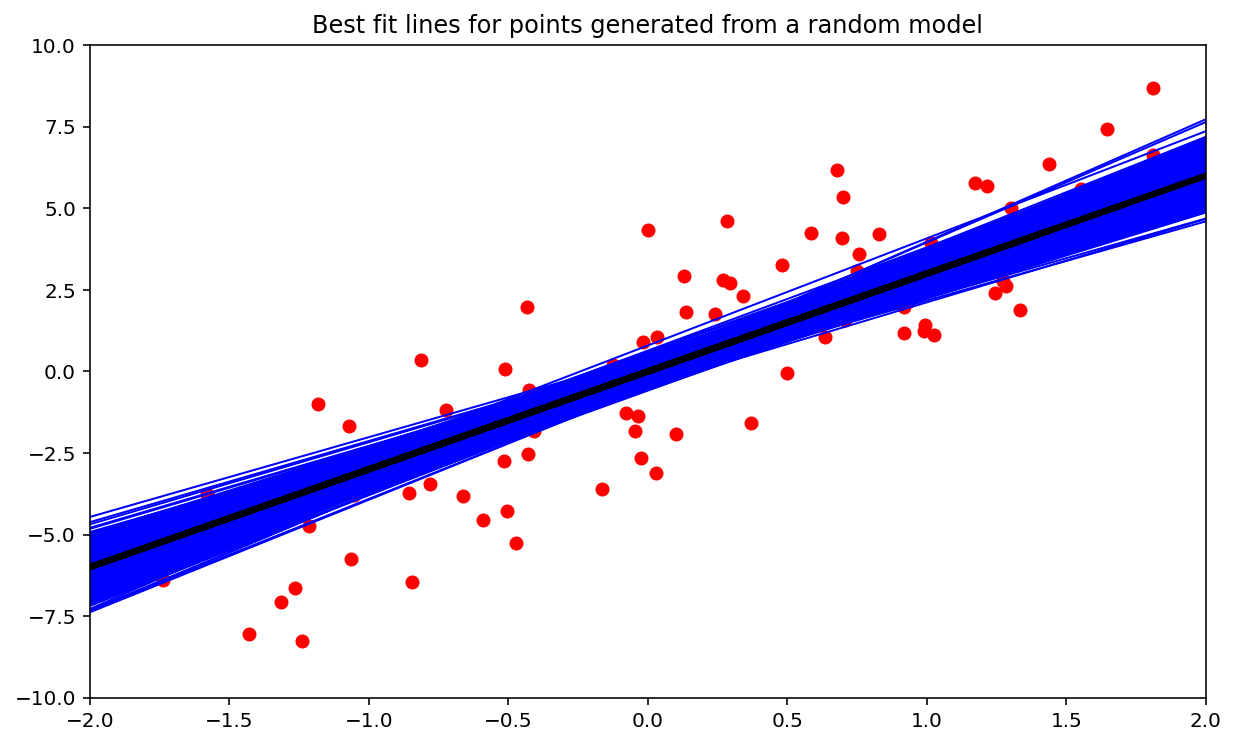

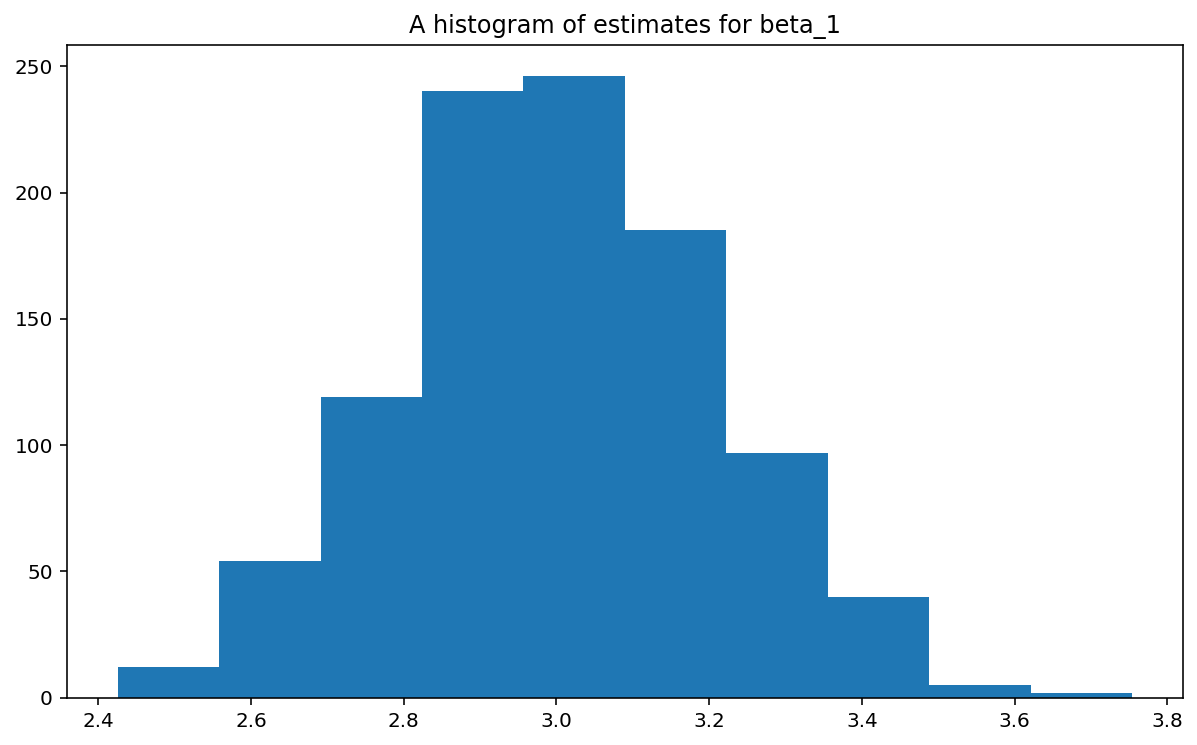

In [13]:
f= lambda x: 3*x
x = np.linspace(-2,2,3).reshape(3,1) #Define 3 values which will be used to plot regression line
plt.figure(0)

sample_size = 100
betaOnes = []
for ii in range(1000):
    xp = norm.rvs(size=sample_size)
    yp = f(xp)+norm.rvs(size=sample_size,scale=2)
    
    if ii == 0: plt.plot(xp,yp,'ro')        

    lr = linear_model.LinearRegression()
    lr.fit(X=xp.reshape(100,1), y=yp)
    plt.plot(x,lr.predict(x),color='blue',linewidth=1)
    
    # Collect the slopes 
    betaOnes.append(lr.coef_[0])

plt.plot(xp,f(xp),'k',linewidth=3)
plt.xlim(-2,2)    
plt.ylim(-10,10)    
plt.title('Best fit lines for points generated from a random model')
plt.show()

plt.figure(1)
plt.hist(betaOnes)
plt.title('A histogram of estimates for beta_1')
plt.show()


## Other advertisement methods?  
Recall that we not only know the ad budget for TV, but also Radio and Newspaper. 

Next, let's repeat the linear regression analysis for the other types of advertisements using `statsmodels`. 

In [14]:
ad_Radio_ols = sm.ols(formula="Sales ~ Radio", data=advert).fit()
ad_Radio_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           4.35e-19
Time:                        09:31:30   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
ad_Newspaper_ols = sm.ols(formula="Sales ~ Newspaper", data=advert).fit()
ad_Newspaper_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 06 Apr 2022   Prob (F-statistic):            0.00115
Time:                        09:31:32   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

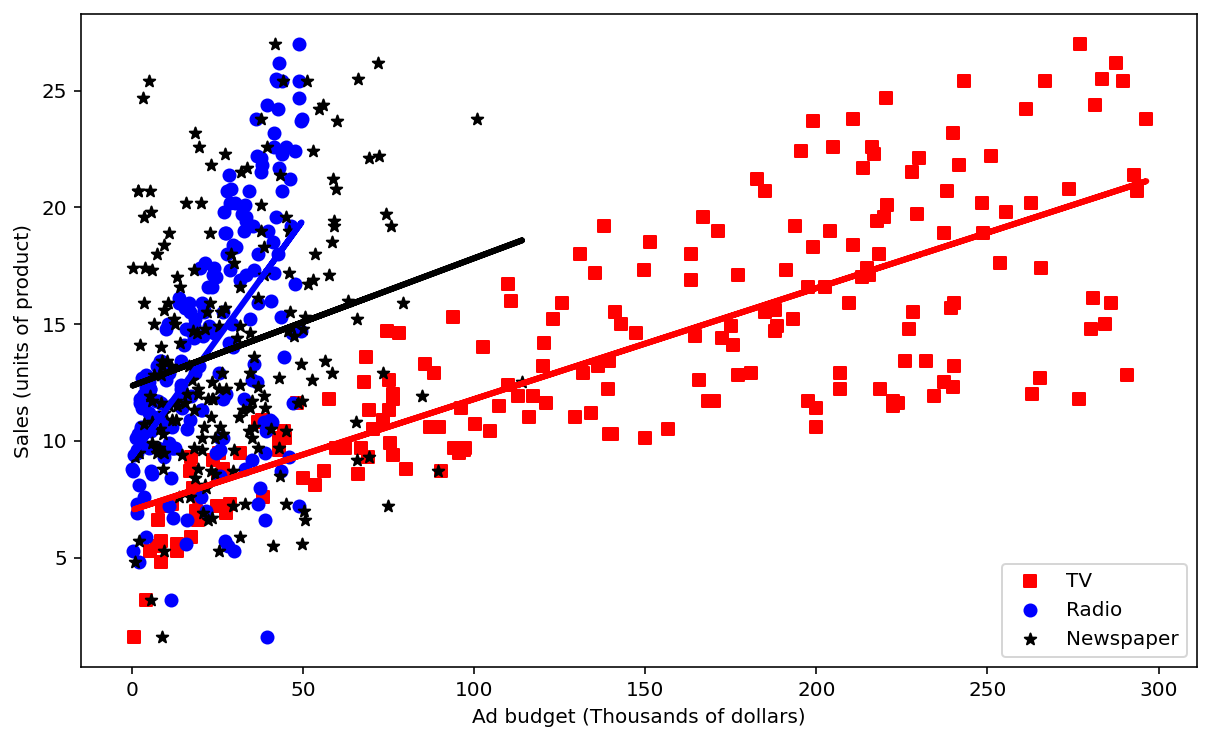

In [16]:
plt.scatter(x=advert['TV'],y=advert['Sales'],c='r',marker='s',label='TV')
plt.scatter(x=advert['Radio'],y=advert['Sales'],c='b',marker='o',label='Radio')
plt.scatter(x=advert['Newspaper'],y=advert['Sales'],c='k',marker='*',label='Newspaper')
plt.legend(loc=4)

plt.plot(advert['TV'],ad_TV_ols.predict(),c='r',linewidth=3)
plt.plot(advert['Radio'],ad_Radio_ols.predict(),c='b',linewidth=3)
plt.plot(advert['Newspaper'],ad_Newspaper_ols.predict(),c='k',linewidth=3)

plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()


## Multiple Linear Regression

**Model:**
$$
Sales = \beta_0 + \beta_1 * TV + \beta_2*Radio + \beta_3*Newspaper. 
$$


In [17]:
ad_all_ols = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=advert).fit()
ad_all_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.58e-96
Time:                        09:31:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation is a number between −1 to +1 and measures how much the two variables vary together. 

Plotted below is also a scatter plot matrix, which is a good way of visualizing the correlations. 

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


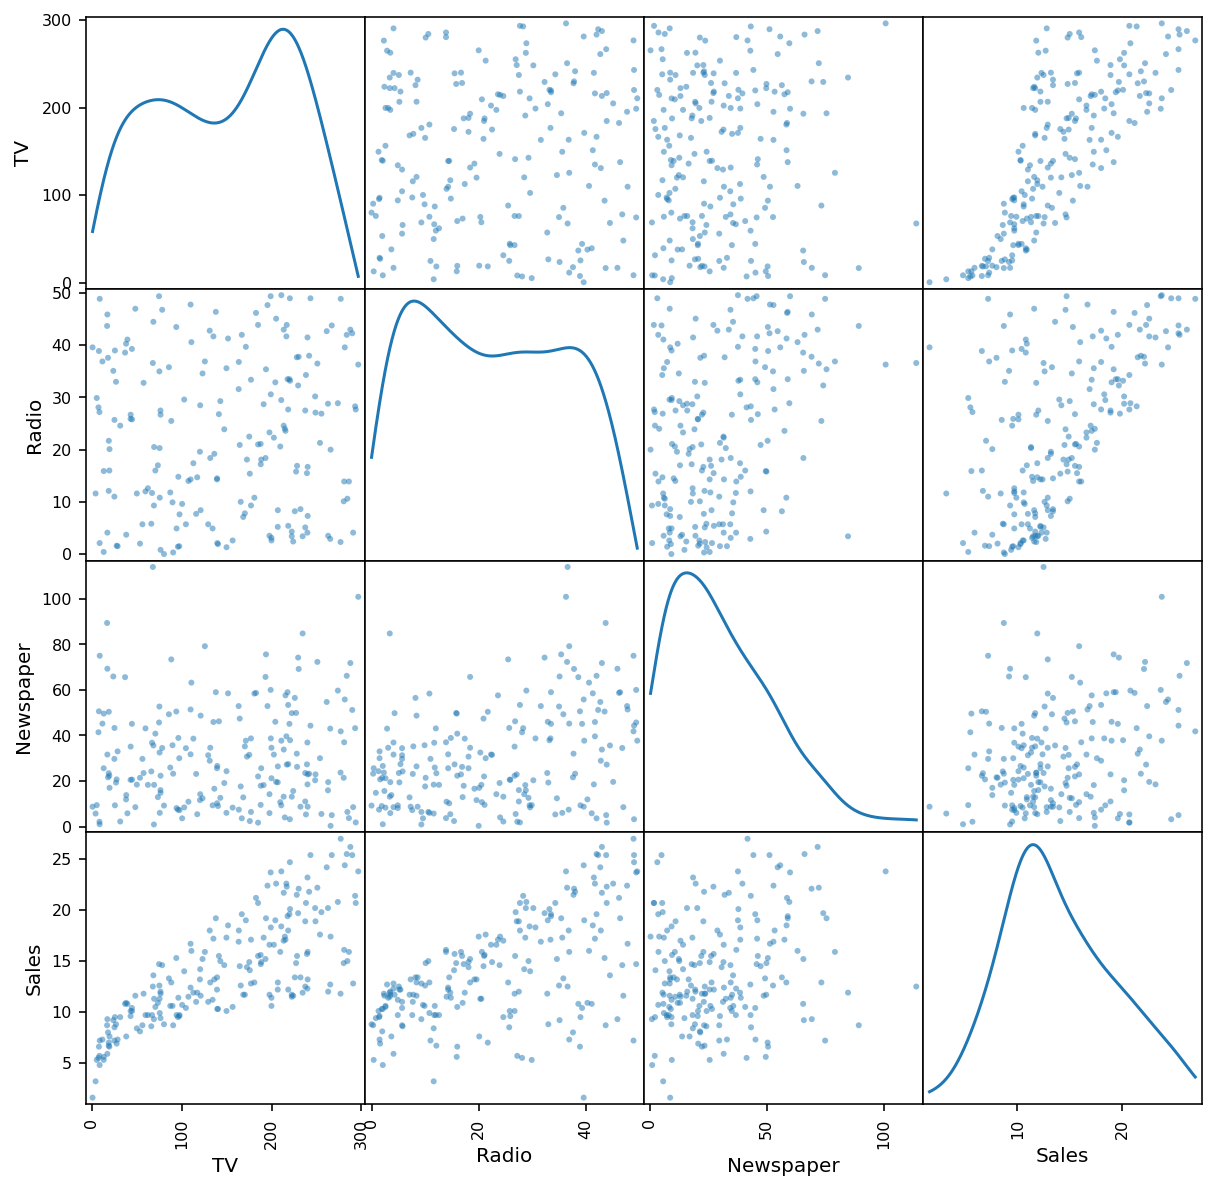

In [18]:
print(advert.corr())
pd.plotting.scatter_matrix(advert, figsize=(10, 10), diagonal='kde')
plt.show()

In [19]:
ad_TR_ols = sm.ols(formula="Sales ~ TV + Radio", data=advert).fit()
ad_TR_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           4.83e-98
Time:                        09:31:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

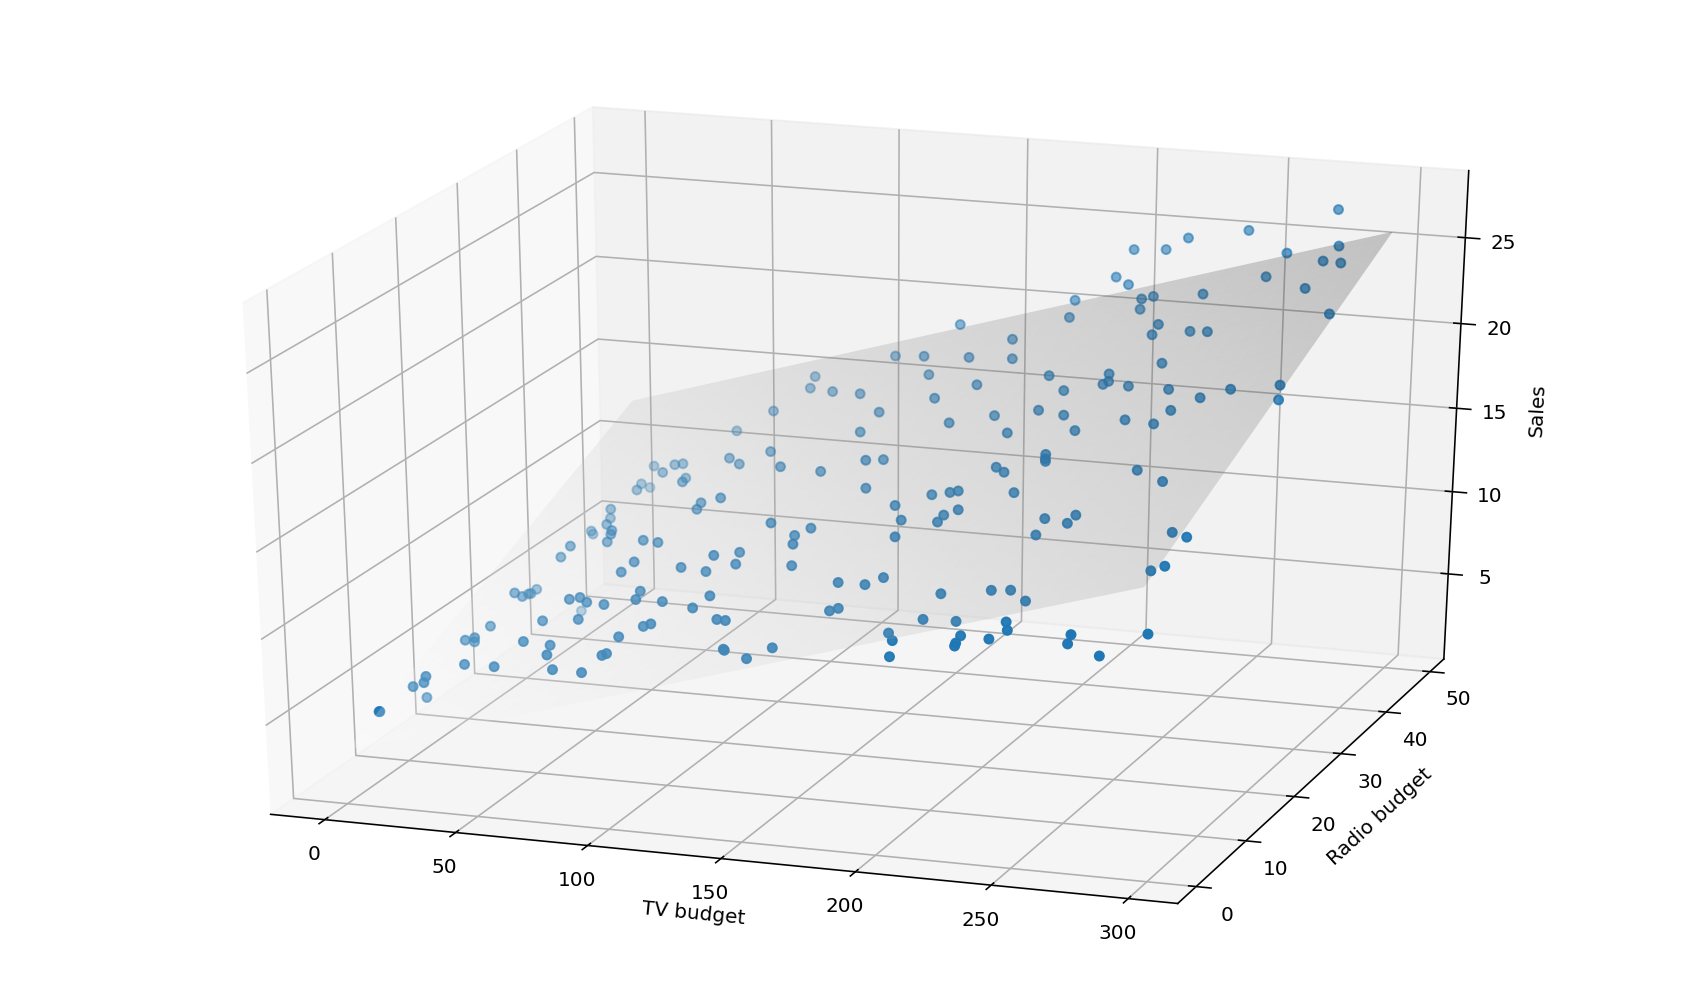

In [20]:
plt.rcParams['figure.figsize'] = (15, 9)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=advert['TV'], ys=advert['Radio'], zs=advert['Sales'])

x = np.linspace(advert['TV'].min(), advert['TV'].max(), 100)
y = np.linspace(advert['Radio'].min(), advert['Radio'].max(), 100)
X,Y = np.meshgrid(x,y)
par = dict(ad_TR_ols.params)
Z = par["Intercept"] + par["TV"]*X + par["Radio"]*Y 
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('TV budget')
ax.set_ylabel('Radio budget')
ax.set_zlabel('Sales')

plt.show()

## Nonlinear relationships

We can consider the interaction between TV and Radio advertising in the model, by taking 
$$
\text{Sales} = \beta_0 + \beta_1 * \text{TV budget} + \beta_2*\text{Radio budget} + \beta_3 \text{TV budget} *\text{Radio budget}. 
$$
The rational behind the last term is that perhaps spending $x$ on television advertising and $y$ on radio advertising leads to more sales than simply $x+y$. In marketing this is known as the *synergy effect* and in statistics it is known as the *interaction effect*.

In [21]:
ad_NL = sm.ols(formula="Sales ~ TV + Radio + TV*Radio", data=advert).fit()
ad_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          6.68e-146
Time:                        09:31:40   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model is really excellent. All of the $p$-values are small and $R^2 = 97\%$ of the variability in the data is accounted for by the model. 

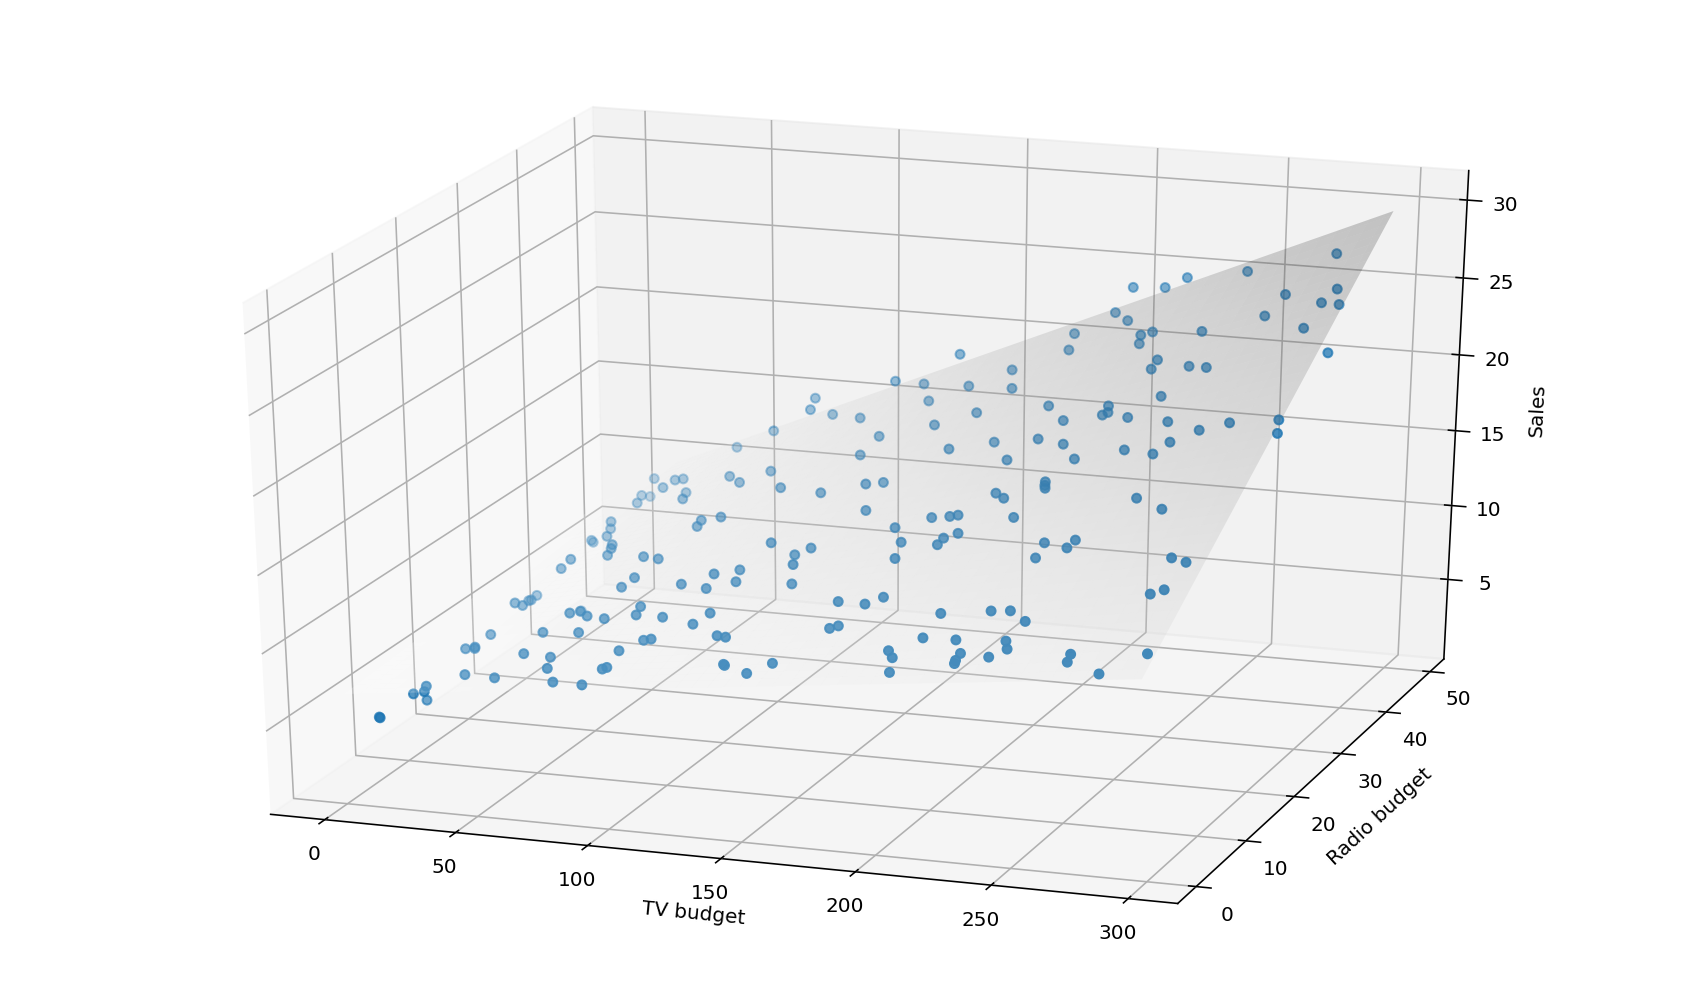

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=advert['TV'], ys=advert['Radio'], zs=advert['Sales'])

x = np.linspace(advert['TV'].min(), advert['TV'].max(), 100)
y = np.linspace(advert['Radio'].min(), advert['Radio'].max(), 100)
X,Y = np.meshgrid(x,y)
par = dict(ad_NL.params)
Z = par["Intercept"] + par["TV"]*X + par["Radio"]*Y + par["TV:Radio"]*X*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('TV budget')
ax.set_ylabel('Radio budget')
ax.set_zlabel('Sales')

plt.show()